In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import pandas as pd
import math

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

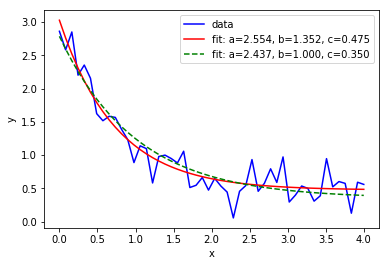

In [18]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Power_divergenceResult(statistic=0.846141008415643, pvalue=0.9999204651000353)


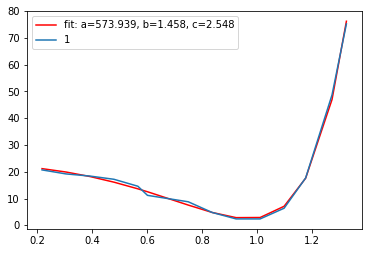

In [47]:
data=pd.read_csv("/Users/giorgio/Desktop/datanalysis/data7.txt",sep="\t",header=None)
def fit(x,a,b,c):
    return a*(((b**2)*np.cos(x)-np.sqrt(b**2-np.sin(x)*np.sin(x)))/((b**2)*np.cos(x)+np.sqrt(b**2-np.sin(x)*np.sin(x))))**2+c

popt, pcov = curve_fit(fit, data[0].values, data[1].values,p0=(600,1.5,2.0))
plt.plot(data[0].values, fit(data[0].values, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(data[0],data[1])
print(chisquare(data[1].values,fit(data[0].values, *popt),ddof=3))
plt.legend()
plt.show()

Power_divergenceResult(statistic=0.0016012971184585104, pvalue=0.9999999999145103)


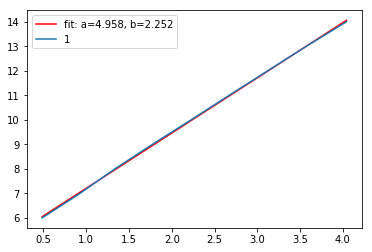

In [48]:
data=pd.read_csv("/Users/giorgio/Desktop/datanalysis/data8.txt",sep="\t",header=None)
def fit(x,a,b):
    return a+b*x

popt, pcov = curve_fit(fit, data[0].values, data[1].values)
plt.plot(data[0].values, fit(data[0].values, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(data[0],data[1])
print(chisquare(data[1].values,fit(data[0].values, *popt),ddof=2))
plt.legend()
plt.show()

Power_divergenceResult(statistic=198.40840854395225, pvalue=nan)
[[ 1.34229980e+02 -5.00428573e-05  2.96671586e-02 -4.12571478e+01
  -1.17828125e-02]
 [-5.00428573e-05  1.98711951e-05  4.02327317e-08  1.41196875e-02
   3.88400127e-06]
 [ 2.96671586e-02  4.02327317e-08  1.99521610e-05  3.35965686e-02
   9.44741565e-06]
 [-4.12571478e+01  1.41196875e-02  3.35965686e-02  1.85876961e+04
   2.94814194e+00]
 [-1.17828125e-02  3.88400127e-06  9.44741565e-06  2.94814194e+00
   9.28077789e-04]]


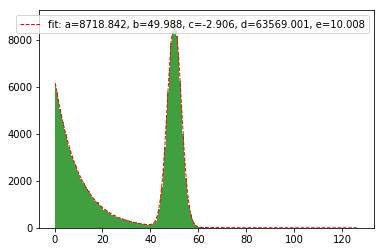

In [102]:
def fit(x,p1,p2,p3,p4,p5):
    return p1*np.exp(-0.5*pow(((x-p2)/p3),2))+p4*(np.exp(-x/p5))/p5
data = pd.read_csv("/Users/giorgio/Desktop/datanalysis/data5.txt",sep="\n",header=None)

n, bins, patches = plt.hist(data[0], 200, facecolor='green', alpha=0.75)
bin_centers = bins[:-1] + np.diff(bins) / 2
popt, pcov = curve_fit(fit, bin_centers,n,p0=(1,50,3,1270,10))
y=fit(bin_centers,*popt)
l = plt.plot(bin_centers, y, 'r--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt),linewidth=1)
print(chisquare(n,y,ddof=200))
print(pcov)
plt.legend()
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()
